# DBSCAN Clustering to identify outliers

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN

from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 7
sb.set_style('whitegrid')

In [3]:
address = 'C:/Users/Beedoo/Desktop/Data/iris.data.csv'
iris = pd.read_csv(address)
iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [4]:
data = iris.iloc[:, iris.columns.get_indexer(['Sepal Length', 'Sepal Width', 'Petal Length', "Petal Width"])]
target = iris.iloc[:, iris.columns.get_loc('Species')]

In [5]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)


In [6]:
print(Counter(model.labels_))

Counter({1: 94, 0: 49, -1: 6})


In [7]:
outliers_label = -1
data_df = pd.DataFrame(data)
print(data_df[model.labels_ == outliers_label])

     Sepal Length  Sepal Width  Petal Length  Petal Width
97            5.1          2.5           3.0          1.1
104           7.6          3.0           6.6          2.1
116           7.7          3.8           6.7          2.2
117           7.7          2.6           6.9          2.3
121           7.7          2.8           6.7          2.0
130           7.9          3.8           6.4          2.0


Text(0.5,1,'DBSCAN for Outlier Detection')

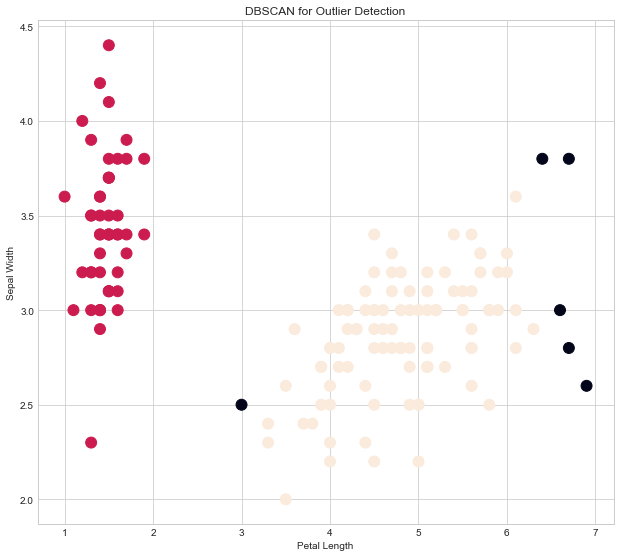

In [10]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_
ax.scatter(data.iloc[:, data.columns.get_loc('Petal Length')], data.iloc[:, data.columns.get_loc('Sepal Width')], c=colors,
           s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')